# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import openweathermapy as owm
import warnings

# Import API key
from config_weather import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities_df = pd.DataFrame({"City":cities})
len(cities_df)


596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
cities_df["Country"] = ""
cities_df["Lat"] = ""
cities_df["Lon"] = ""
cities_df["Temperature"] = ""
cities_df["Humidity(%)"] = ""
cities_df["Cloudiness(%)"] = ""
cities_df["Wind Speed"] = ""
city_subset = cities_df.head()
city_subset

,City,Country,Lat,Lon,Temperature,Humidity(%),Cloudiness(%),Wind Speed
0,marcona,,,,,,,
1,brae,,,,,,,
2,busselton,,,,,,,
3,casper,,,,,,,
4,bandarbeyla,,,,,,,


In [8]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

for row in cities_df.itertuples():
    city = cities_df.at[row.Index,'City']
    params = {"q": city,
              "appid" : api_key,
             }
    params['keyword'] = city
    target_url = requests.get(base_url,params=params).json()
    
    #if(target_url["cod"] == 200):
    
    if(target_url.get("name")):
        print(f"Processing Record {row.Index} | {city}")
        cities_df.at[row.Index,"Country"] = target_url.get("sys").get("country")
        cities_df.at[row.Index,"Lat"] = target_url.get("coord").get("lat")
        cities_df.at[row.Index,"Lon"] = target_url.get("coord").get("lon")
        cities_df.at[row.Index,"Temperature"] = target_url.get("main").get("temp")
        cities_df.at[row.Index,"Humidity(%)"] = target_url.get("main").get("humidity")
        cities_df.at[row.Index,"Cloudiness(%)"] = target_url.get("clouds").get("all")
        cities_df.at[row.Index,"Wind Speed"] = target_url.get("wind").get("speed")
    else:
        print(f"City not found. Skipping...")


City not found. Skipping...
Processing Record 1 | brae
Processing Record 2 | busselton
Processing Record 3 | casper
Processing Record 4 | bandarbeyla
Processing Record 5 | port elizabeth
Processing Record 6 | bluff
Processing Record 7 | cayenne
City not found. Skipping...
City not found. Skipping...
Processing Record 10 | ushuaia
Processing Record 11 | adrar
Processing Record 12 | padang
Processing Record 13 | saint-philippe
Processing Record 14 | gayeri
City not found. Skipping...
Processing Record 16 | waingapu
Processing Record 17 | punta arenas
City not found. Skipping...
Processing Record 19 | sorong
Processing Record 20 | miyakonojo
Processing Record 21 | bambous virieux
Processing Record 22 | puerto ayora
Processing Record 23 | roseburg
Processing Record 24 | qaanaaq
Processing Record 25 | casa nova
Processing Record 26 | nikolskoye
City not found. Skipping...
Processing Record 28 | lagoa
Processing Record 29 | vao
Processing Record 30 | chikwawa
Processing Record 31 | atuona
Pr

Processing Record 252 | aliwal north
Processing Record 253 | amahai
Processing Record 254 | san andres del rabanedo
Processing Record 255 | grand gaube
City not found. Skipping...
Processing Record 257 | puerto narino
Processing Record 258 | hofn
Processing Record 259 | igarka
Processing Record 260 | iqaluit
Processing Record 261 | coihaique
Processing Record 262 | saskylakh
Processing Record 263 | sao felix do xingu
Processing Record 264 | pachmarhi
Processing Record 265 | atasu
Processing Record 266 | neiafu
Processing Record 267 | libungan
Processing Record 268 | tiarei
Processing Record 269 | luderitz
Processing Record 270 | pedernales
Processing Record 271 | aleksandro-nevskiy
Processing Record 272 | stromness
Processing Record 273 | nisia floresta
City not found. Skipping...
Processing Record 275 | limulunga
Processing Record 276 | kirakira
Processing Record 277 | manokwari
Processing Record 278 | hasaki
Processing Record 279 | ust-karsk
Processing Record 280 | muhos
Processing R

Processing Record 502 | mechetinskaya
Processing Record 503 | micheweni
Processing Record 504 | caernarfon
Processing Record 505 | erzin
Processing Record 506 | atar
Processing Record 507 | coari
Processing Record 508 | kamenka
Processing Record 509 | astana
Processing Record 510 | bograd
Processing Record 511 | half moon bay
Processing Record 512 | pacific grove
Processing Record 513 | bilibino
Processing Record 514 | kyshtovka
Processing Record 515 | girona
Processing Record 516 | cortez
Processing Record 517 | rawson
Processing Record 518 | sawankhalok
Processing Record 519 | estacion coahuila
City not found. Skipping...
Processing Record 521 | camabatela
Processing Record 522 | yerbogachen
Processing Record 523 | gisborne
Processing Record 524 | namtsy
Processing Record 525 | santa cruz
Processing Record 526 | flin flon
Processing Record 527 | robertson
Processing Record 528 | talas
Processing Record 529 | prince rupert
Processing Record 530 | halifax
Processing Record 531 | valley

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Output File (CSV)
output_data_file = "cities_df.csv"
cities_df

,City,Country,Lat,Lon,Temperature,Humidity(%),Cloudiness(%),Wind Speed
0,marcona,,,,,,,
1,brae,GB,60.4,-1.35,279.15,90,48,16.5
2,busselton,AU,-33.64,115.35,282.58,65,48,7.92
3,casper,US,42.87,-106.31,281.28,49,90,2.1
4,bandarbeyla,SO,9.49,50.81,298.893,100,92,3.27
5,port elizabeth,US,39.31,-74.98,282.97,49,40,9.8
6,bluff,AU,-23.58,149.07,294.393,90,0,2.77
7,cayenne,GF,4.94,-52.33,301.15,74,20,6.2
8,grand river south east,,,,,,,
9,nizhneyansk,,,,,,,


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

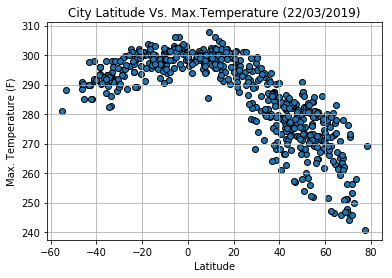

In [10]:
d=datetime.datetime.today()
plt.scatter(pd.to_numeric(cities_df["Lat"]),pd.to_numeric(cities_df["Temperature"]),edgecolors="k",linewidths=1.00)
plt.title(f"City Latitude Vs. Max.Temperature ({d.strftime('%d/%m/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (F)")
plt.grid()

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity(%)')

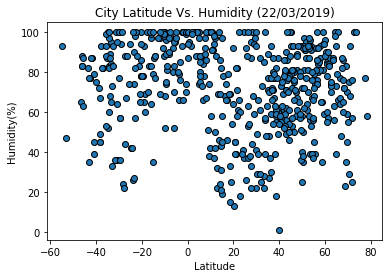

In [11]:
plt.scatter(pd.to_numeric(cities_df["Lat"]),pd.to_numeric(cities_df["Humidity(%)"]),edgecolors="k",linewidths=1.00)

plt.title(f"City Latitude Vs. Humidity ({d.strftime('%d/%m/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness(%)')

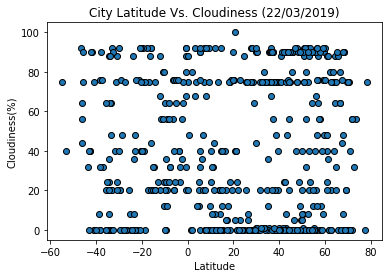

In [12]:
plt.scatter(pd.to_numeric(cities_df["Lat"]),pd.to_numeric(cities_df["Cloudiness(%)"]),edgecolors="k",linewidths=1.00)
plt.title(f"City Latitude Vs. Cloudiness ({d.strftime('%d/%m/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

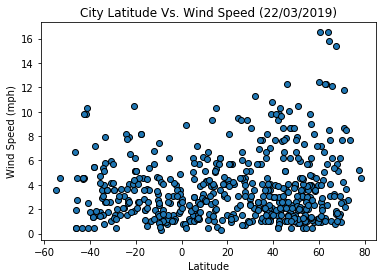

In [13]:
plt.scatter(pd.to_numeric(cities_df["Lat"]),pd.to_numeric(cities_df["Wind Speed"]),edgecolors="k",linewidths=1.00)
plt.title(f"City Latitude Vs. Wind Speed ({d.strftime('%d/%m/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")